# Naive Bayes 

Naive Bayes models are a useful and effective simplification of the general Bayesian models. Naive Bayes models make the naive assumption of statistical independence of the features. In many cases, naive Bayes module are surprisingly effective despite violating the assumption of independence. 

In simple terms, naive Bayes models use empirical distributions of the features to compute probabilities of the labels. The naive Bayes models can use almost any family of distributions for the features. It is important to select the correct distribution family for the data you are working with. Common cases are:
- **Gaussian;** for continuous or numerical features.
- **Bernoulli;** for features with binary values. 
- **Multinomial;** for features with more than two categories. 

There is one pit fall, the model fails if a zero probability is encountered. This situation occurs when there is a 'hole' in the sample space where there are no samples. A simple smoothing procedure can deal with this problem. The smoothing hyperparameter, usually called alpha, is one of the few required for naive Bayes models. 

Some properties of naive Bayes models are:
- Computational complexity is linear in number of parameter/features, making naive Bayes models highly scalable. There are out or core approaches suitable for massive datasets.
- Requires minimal data to produce models that generalizes well. If there are only a few cases per category to train a model a naive Bayes model can be a good choice. 
- Have a simple and inherent regularization.

Naive Bayes models are used in many situations including:

- Document classification
- SPAM detection
- Image classification 

## Example: Iris dataset

As a first example, we will use a Naive Bayes model to classify the species of iris flowers. 

Iris flower dataset is a native sklearn dataset that can be loaded from the sklearn module.

In [3]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

To get more intuition about these data, we will both load and plot them. The code in the cell below does the following:

1. Loads the iris data as a Pandas data frame. 
2. Adds column names to the data frame.
3. Displays all 4 possible scatter plot views of the data. 
 

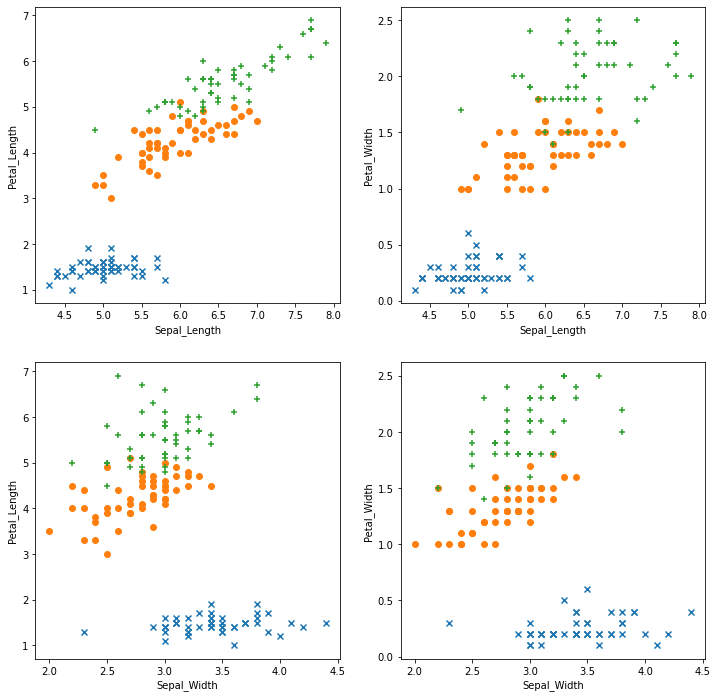

In [4]:
def plot_iris(iris):
    '''Function to plot iris data by type'''
    setosa = iris[iris['Species'] == 'setosa']
    versicolor = iris[iris['Species'] == 'versicolor']
    virginica = iris[iris['Species'] == 'virginica']
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = 'x')
            ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = 'o')
            ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = '+')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])
            
## Import the dataset from sklearn.datasets
iris = datasets.load_iris()
## Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

## Plot views of the iris data            
plot_iris(iris)

In [5]:
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can see that Setosa (blue) is well separated from the other two categories. The Versicolor (orange) and the Virginica (green) show considerable overlap. The question is how well our classifier will separate these categories. 

Scikit Learn classifiers require numerically coded numpy arrays for the features and as a label. The code in the cell below does the following processing:
1. Creates a numpy array of the features.
2. Numerically codes the label using a dictionary lookup, and converts it to a numpy array. 

In [6]:
Features = np.array(iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])

levels = {'setosa':0, 'versicolor':1, 'virginica':2}
Labels =  np.array([levels[x] for x in iris['Species']])

Next, we will execute the code in the cell below to split the dataset into test and training set. We would only use 50 out of the available 150 cases for training. This is just to emphasize the point that it requires small training data.

In [7]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 30)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

As we have always done with previous machine learning algorithms, numeric features  must be scaled. The code in the cell below performs the following processing:

1. A Zscore scale object is defined using the `StandarScaler` function from the scikit-learn preprocessing package. 
2. The scaler is fit to the training features. Subsequently, this scaler is used to apply the same scaling to the test data and in production. 
3. The training features are scaled using the `transform` method.

In [8]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

We will now define and fit a Gaussian naive Bayes model. A Gaussian model is appropriate here since all of the features are numeric and continuous. 

The code in the cell below defines a Gaussian naive Bayes model object using the `GaussianNB` function from the scikit-learn naive_bayes package, and then fits the model.

In [9]:
NB_mod = GaussianNB()
NB_mod.fit(X_train, y_train)

GaussianNB()

Notice that the Gaussian naive Bayes model object has only one hyperparameter. 

Next, the code in the cell below performs the following processing to score the test data subset:
1. The test features are scaled using the scaler computed for the training features. 
2. The `predict` method is used to compute the scores from the scaled features. 

In [10]:
X_test = scale.transform(X_test)
scores = NB_mod.predict(X_test)

Now we need to evaluate the model results. We should keep in mind that this problem has been made deliberately difficult, by having more test cases than training cases. 

The iris data has three species categories. Therefore it is necessary to use evaluation code for a three category problem. The function in the cell below would help us evaluate a 3 category classifier

In [11]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Setosa   Score Versicolor    Score Virginica')
    print('Actual Setosa      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Versicolor  %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Vriginica   %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Setosa  Versicolor  Virginica')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)   

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          11                0                 0
Actual Versicolor       0               10                 0
Actual Vriginica        0                0                 9

Accuracy        1.00
 
          Setosa  Versicolor  Virginica
Num case   11.00     10.00      9.00
Precision   1.00      1.00       1.00
Recall      1.00      1.00       1.00
F1          1.00      1.00       1.00


Let us examine these results. We should notice the following:
1. The confusion matrix has dimension 3X3 and most cases are correctly classified. 
2. The overall accuracy is 0.91. Since the classes are roughly balanced, this metric indicates relatively good performance of the classifier, particularly since it was only trained on 50 cases. As was mentioned previously, naive Bayes models require only small amounts of training data. 
3. The precision, recall and  F1 for each of the classes is relatively good. Versicolor has the worst metrics since it has the largest number of misclassified cases. 

To better understand the model's performance,we would display a set of plots showing correctly (as '+') and incorrectly (as 'o') cases, with the species color-coded.

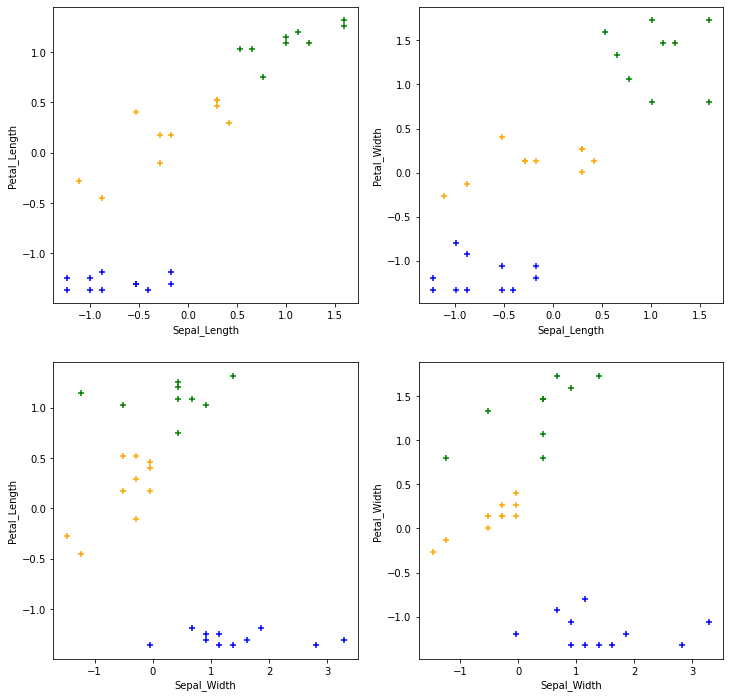

In [12]:
def plot_iris_score(iris, y_test, scores):  
    '''Function to plot iris data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    iris = pd.DataFrame(iris)
    levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    
    for t in range(2): # loop over correct and incorect classifications
        setosa = iris[(iris['Species'] == 'setosa') & (true == t)]
        versicolor = iris[(iris['Species'] == 'versicolor') & (true == t)]
        virginica = iris[(iris['Species'] == 'virginica') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2): 
                ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_iris_score(X_test, y_test, scores)

When we examine these plots, we will see how the classifier has divided the feature space between the classes. It is obvious that most of the errors occur in the overlap region between Virginica and Versicolor. This behavior is to be expected.